In [93]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import pandas_bokeh
from qgrid import show_grid
# import finplot as fplt

import polygon_rest_api as papi
import polygon_backfill as pb
# import ray_backfill as rb
import polygon_s3 as ps3
import bar_samples as bs
import bar_labels as bl

import filters as ft
# import market_cluster as mc

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20, 7]
from matplotlib import style
style.use('fivethirtyeight')

import ipdb
# ipdb.set_trace(context=10)

# df.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)  # 'Blues', 'coolwarm', 'RdBu_r' & 'BrBG' are other good diverging colormaps
# pd.set_option('precision', 2)

# get local market daily data
# mdf = pd.read_parquet('data/mdf.parquet')

# .plot_bokeh(sizing_mode="scale_height")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
symbol='GLD'
# symbol = 'market'
date = '2020-01-02'
start_date = '2020-01-01' 
end_date = '2020-01-10'
# symbols=['SPY', 'QQQ']
tick_type='trades'
# tick_type = None

result_path = '/Users/bobcolner/QuantClarity/pandas-polygon/data'

thresh = {
    # GT thresholds
    'renko_reveral_multiple': 2,
    'duration_sec': 60*30,
#     'tick_imbalance': 150,
    # LT thresholds 
    'min_duration_sec': 15,
    'min_tick_count': 30,
}

In [ ]:
# open_dates = pb.get_open_market_dates(start_date, end_date)
daily_vol_df = ps3.get_symbol_vol_filter(result_path, symbol, start_date)
bar_dates = {}
# for n, date in enumerate(open_dates):
for row in daily_vol_df.itertuples():
    # load ticks
    tdf = ps3.load_ticks(result_path, symbol, row.date)
    # sample bars
    thresh.update({'renko_size': row.range_jma / 20})
    bars, state = bs.build_bars(tdf, thresh)
    bar_dates[date] = bars

In [ ]:
show_grid(pd.DataFrame(bar_dates[open_dates[2]])[['bar_trigger','open_at','close_at','duration_min','ticks','price_wmean']])

In [ ]:
# range / price = HFT profit potential
(df.price.max() - df.price.min()) / df.price.mean()

In [ ]:
# label bars
label_horizon_mins = 30
risk_level = 0.2
# reward_base = 1
reward_ratios = np.arange(3, 20, .5)

lbars = bl.label_bars(bars, ticks_df, risk_level, label_horizon_mins, reward_ratios)

lbars_df = pd.DataFrame(lbars)

lbars_unq = bl.get_concurrent_stats(lbars_df)
print(lbars_unq['grand_avg_unq'])

In [ ]:
lbars_df[['price_wmean', 'label_rrr']].plot_bokeh(sizing_mode="scale_height")
# 17, 31

In [ ]:
lbars_df[['price_wmean', 'label_rrr']].plot(subplots=True, figsize=[17,12])

<AxesSubplot:xlabel='date_time'>

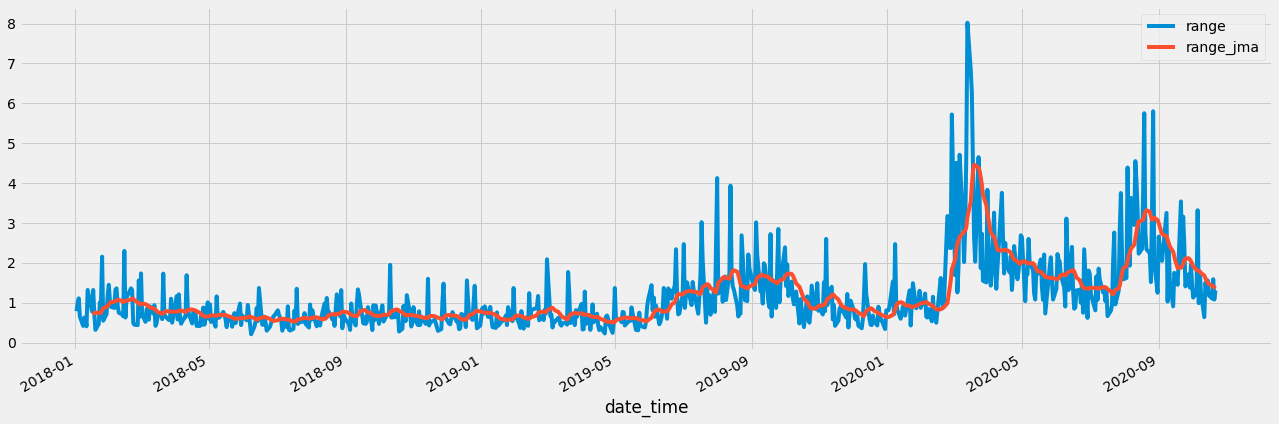

In [98]:
df[['range', 'range_jma']].plot()
# df2[['range', 'range_jma']].plot_bokeh(sizing_mode="scale_height")